The aim of this notebook is to get a feel for training a model using Keras. It is fine if you don't understand what these lines are doing, I will cover it later.


Colab has tensorflow already installed. Let's load up the MNIST dataset

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
60000
[5 0 4 ... 5 6 8]


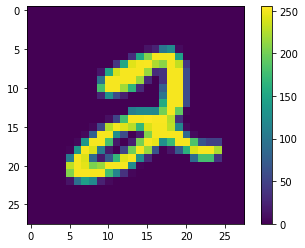

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt


(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape)

print(len(train_labels))

print(train_labels)

# see one image
one_image = train_images[5]
plt.figure()
plt.imshow(one_image)
plt.colorbar()
plt.grid(False)
plt.show()

# Need to convert train_images entries in the range of 0-1 from 0-255
# also change dType to float32 (255.0 does that)

train_images, test_images = train_images/255.0, test_images/255.0
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels_orig = test_labels.copy()
test_labels = tf.keras.utils.to_categorical(test_labels)


In [3]:
network = tf.keras.models.Sequential()
network.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
network.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(tf.keras.layers.Dense(10, activation='softmax'))


network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 9ms/step - loss: 0.2563 - accuracy: 0.9253
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1032 - accuracy: 0.9686
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0684 - accuracy: 0.9799
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0489 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0374 - accuracy: 0.9884


The above code adds a sequential model where you "stack" the layers. The first layer (`layers.Flatten`) helps to reshape the input from (6000, 28, 28) to (6000, 28*28). You can also use

`train_images = train_images.reshape(6000, 28*28) `

and avoid the flattening layer.

once you add the network, you have to mention an '*optimizer*' which takes in the loss and tells how much the weights are to change and a '*loss function*' which says how much difference there is with the actual label and the predicted label.

A 'Dense' layer means it's a fully connected layer. (every neuron gets all outputs?)

The loss and accuracy printed alongside each epoch increases over each epoch.

The batchsize is somehow connected to the train/test split, will update this with that.

now we are going to run it on the test set and test labels.

In [4]:
test_loss, test_accuracy = network.evaluate(test_images, test_labels)
print('loss: ', test_loss, ' Accuracy: ', test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0668 - accuracy: 0.9791
loss:  0.06679893285036087  Accuracy:  0.9790999889373779


Time to see what our model predicts. we take some data off the test set, see their labels and then see what our model has predicted.

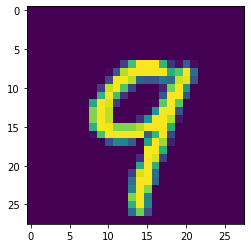

Label of this image:  9
Result classes:  [9]


In [5]:
data = np.array([test_images[12],])
label = test_labels_orig[12]
# show images
for i in data:
  plt.imshow(i)
  plt.show()
# show labels
print('Label of this image: ', label)

# network.predict_classes(data)
print('Result classes: ', np.argmax(network.predict(data), axis=-1))

now for extra credits, let's try adding a 'dropout' layer as shown in the example and see if that makes any difference. (https://www.tensorflow.org/tutorials/quickstart/beginner)


We will get to the importance of dropout later (re: overfitting)


In [0]:
network2 = tf.keras.models.Sequential()
network2.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
network2.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(28*28,)))
network2.add(tf.keras.layers.Dropout(0.2))
network2.add(tf.keras.layers.Dense(10, activation='softmax'))


network2.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network2.fit(train_images, train_labels, epochs=5, batch_size=128)

test_loss, test_accuracy = network2.evaluate(test_images, test_labels)
print('loss: ', test_loss, ' Accuracy: ', test_accuracy)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2732 - accuracy: 0.9207
Epoch 2/5
469/469 [==============================] - 4s 10ms/step - loss: 0.1187 - accuracy: 0.9650
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0833 - accuracy: 0.9748
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0641 - accuracy: 0.9802
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0670 - accuracy: 0.9804
loss:  0.06703482568264008  Accuracy:  0.980400025844574
